Load data from http://media.wiley.com/product_ancillary/6X/11186614/DOWNLOAD/ch06.zip, RetailMart.xlsx

In [43]:
# code written in py_3.0

import pandas as pd
import numpy as np

Load customer account data - i.e., past product sales data

In [44]:
# find path to your RetailMart.xlsx
file_path = 'data/ch06/RetailMart.xlsx'
df_accounts = pd.read_excel(file_path, sheet_name='Training Data')
df_accounts.head()

C:\Users\elror\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,Implied Gender,Home/Apt/ PO Box,Pregnancy Test,Birth Control,Feminine Hygiene,Folic Acid,Prenatal Vitamins,Prenatal Yoga,Body Pillow,Ginger Ale,Sea Bands,Stopped buying ciggies,Cigarettes,Smoking Cessation,Stopped buying wine,Wine,Maternity Clothes,Unnamed: 17,PREGNANT
0,M,A,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,NaN,1
1,M,H,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,NaN,1
2,M,H,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,NaN,1
3,U,H,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,NaN,1
4,F,A,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,NaN,1


In [45]:
df_accounts = df_accounts.drop('Unnamed: 17', axis=1) # drop empty col
df_accounts.rename(columns={'PREGNANT':'Pregnant', 'Home/Apt/ PO Box':'Residency'}, inplace=True)
df_accounts.head()

,Implied Gender,Residency,Pregnancy Test,Birth Control,Feminine Hygiene,Folic Acid,Prenatal Vitamins,Prenatal Yoga,Body Pillow,Ginger Ale,Sea Bands,Stopped buying ciggies,Cigarettes,Smoking Cessation,Stopped buying wine,Wine,Maternity Clothes,Pregnant
0,M,A,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,M,H,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,M,H,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,U,H,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,F,A,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1


In [46]:
#df_accounts.columns = [x.strip().replace(' ', '_') for x in df_accounts.columns] # python does not like spaces in var names
df_accounts = df_accounts.rename(columns=lambda x: x.strip().replace(' ', '_'))
df_accounts.head()

,Implied_Gender,Residency,Pregnancy_Test,Birth_Control,Feminine_Hygiene,Folic_Acid,Prenatal_Vitamins,Prenatal_Yoga,Body_Pillow,Ginger_Ale,Sea_Bands,Stopped_buying_ciggies,Cigarettes,Smoking_Cessation,Stopped_buying_wine,Wine,Maternity_Clothes,Pregnant
0,M,A,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,M,H,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,M,H,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,U,H,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,F,A,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1


We need to categorise the 'Pregnant' column so that it can only take on one of two (in this case) possabilities. Here 1 = pregnant, and 0 = not pregnant

In [47]:
df_accounts['Pregnant'].unique()

array([1, 0], dtype=int64)

In [48]:
#타입을 바꾸는 건데, asssign 구문은 마치 값을 넣는 거 같네.. 
df_accounts['Pregnant'] = df_accounts['Pregnant'].astype('bool') 

Following Greg Lamp over at the Yhat Blog (see [here](http://blog.yhat.com/posts/logistic-regression-python-rodeo.html)), we need to 'dummify' (i.e., separate out) the catagorical variables: gender and residency

In [49]:
# dummify gender var
dummy_gender = pd.get_dummies(df_accounts['Implied_Gender'], prefix='Gender')
print(dummy_gender.head())

   Gender_F  Gender_M  Gender_U
0         0         1         0
1         0         1         0
2         0         1         0
3         0         0         1
4         1         0         0


In [50]:
# dummify residency var
dummy_resident = pd.get_dummies(df_accounts['Residency'], prefix='Resident')
print(dummy_resident.head())

   Resident_A  Resident_H  Resident_P
0           1           0           0
1           0           1           0
2           0           1           0
3           0           1           0
4           1           0           0


In [51]:
#['Implied_Gender', 'Residency']를 drop하지 않으면? logistic회귀분석 로직 내부에서 오류를 뱉는다.
#이 변수들의 타입이 numeric이 아니기 때문이다.
data = pd.concat([dummy_gender[['Gender_M', 'Gender_U']], dummy_resident[['Resident_H', 'Resident_P']], df_accounts.drop(columns=['Implied_Gender', 'Residency'])], axis=1)
data.insert(0, 'Intercept', 1.0) # manually add the intercept
data.head()

,Intercept,Gender_M,Gender_U,Resident_H,Resident_P,Pregnancy_Test,Birth_Control,Feminine_Hygiene,Folic_Acid,Prenatal_Vitamins,...,Body_Pillow,Ginger_Ale,Sea_Bands,Stopped_buying_ciggies,Cigarettes,Smoking_Cessation,Stopped_buying_wine,Wine,Maternity_Clothes,Pregnant
0,1.0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,True
1,1.0,1,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,True
2,1.0,1,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,True
3,1.0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,True
4,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,True


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Intercept               1000 non-null   float64
 1   Gender_M                1000 non-null   uint8  
 2   Gender_U                1000 non-null   uint8  
 3   Resident_H              1000 non-null   uint8  
 4   Resident_P              1000 non-null   uint8  
 5   Pregnancy_Test          1000 non-null   int64  
 6   Birth_Control           1000 non-null   int64  
 7   Feminine_Hygiene        1000 non-null   int64  
 8   Folic_Acid              1000 non-null   int64  
 9   Prenatal_Vitamins       1000 non-null   int64  
 10  Prenatal_Yoga           1000 non-null   int64  
 11  Body_Pillow             1000 non-null   int64  
 12  Ginger_Ale              1000 non-null   int64  
 13  Sea_Bands               1000 non-null   int64  
 14  Stopped_buying_ciggies  1000 non-null   i

In [68]:
# define X and y
train_cols = data.columns[1:-1] #Intercept와 Pregnent 모두 빼줘야 함.
#train_cols = data.columns[:-1] #특히, Logistic과 달리 Intercept를 빼주지 않으면, f-regression으로 검증시 오류가 생김.

X = data[train_cols]
y = data['Pregnant']

# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# train(fitb) a logistic regression model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

In [82]:
lm.coef_, lm.intercept_

(array([-0.07338321,  0.02223572, -0.02137823,  0.02119494,  0.20345846,
        -0.27803218, -0.23814387,  0.32946004,  0.29409627,  0.29335124,
         0.13169658,  0.20701709,  0.1473972 ,  0.16548575, -0.17127013,
         0.20037893,  0.19975101, -0.19381337,  0.20644635]),
 0.4568742032509519)

In [77]:
lm.score(X, y) # R-squared

0.4561602474093953

In [99]:
from sklearn.feature_selection import f_regression

# Calculate the F-values and p-values for each predictor variable
f_statistic, p_values = f_regression(X, y)

print(f'F-values: {f_statistic}')
print(f'p-values: {p_values}')

F-values: [1.27288404e+01 1.54462597e+00 6.39129043e-02 4.77900685e-02
 6.05611412e+01 9.43960871e+01 6.33093051e+01 1.23081935e+02
 8.98200000e+01 1.46663605e+01 5.67819754e+00 2.95768873e+01
 1.12368641e+01 4.18758669e+01 3.30657687e+01 3.89022180e+01
 6.30833271e+01 6.80836387e+01 7.82928627e+01]
p-values: [3.77171910e-04 2.14222466e-01 8.00467089e-01 8.26999027e-01
 1.77633649e-14 2.20777609e-21 4.77368221e-15 4.73843495e-27
 1.83373669e-20 1.36318197e-04 1.73633424e-02 6.75927582e-08
 8.31986172e-04 1.52177268e-10 1.18363917e-08 6.57080940e-10
 5.31752112e-15 4.91794842e-16 3.97045671e-18]


In [101]:
p_values >= 0.05

array([False,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [54]:
# make predictions for testing set
y_pred = lm.predict(X_test)

In [67]:
y_pred

array([ 0.10545881,  0.52759851,  0.63895444,  0.75097048,  0.4568742 ,
        0.12665375,  0.66332055, -0.23842975,  0.85705855,  1.4986664 ,
        0.43549598,  0.43549598,  0.14534712,  0.66332055,  0.38349099,
        0.36211276,  0.79587462,  0.7076369 ,  0.38349099,  1.46749014,
        0.18967762,  0.63587491,  0.43549598,  0.10545881,  0.44514107,
        0.46211182,  0.95798756,  0.24679504,  0.98608525,  0.78633424,
        0.19084263,  0.07041248,  0.24168261,  0.66332055,  0.78968835,
        0.75097048,  0.80752919,  0.75097048,  0.43549598,  0.42075003,
        0.26306084,  0.4568742 ,  0.75097048,  0.69300009,  0.38349099,
        0.40468593,  0.21222086,  0.53088819,  1.04282402,  0.38349099,
        0.24956633,  0.82211096,  0.60427141,  0.36211276,  0.76831012,
        1.16816548,  0.39005655,  0.26306084,  0.72959225,  0.47806915,
        0.66332055,  0.4568742 ,  0.82016339,  0.43549598,  0.40716836,
        0.4577317 ,  0.75097048,  0.38349099,  0.1239689 ,  0.80

In [55]:
# Evaluate the performance of the model

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.12533913204126618


R-square, F test, t test는 어떻게 하나?
LogisticRegression

In [56]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.49812955650079194


In [57]:
from sklearn.feature_selection import f_regression

f_value, p_value = f_regression(X_train, y_train)

print("F-value:", f_value)
print("p-value:", p_value)

F-value: [6.53490061e+00 1.10995652e+00 1.88720965e-02 1.87557326e-01
 4.67784079e+01 7.26352844e+01 5.24731711e+01 9.19083955e+01
 6.53261607e+01 8.32395953e+00 2.92401702e+00 1.64800856e+01
 1.07958455e+01 3.36314537e+01 1.72415052e+01 2.83204586e+01
 5.31190027e+01 4.20434922e+01 5.21517226e+01]
p-value: [1.07742609e-02 2.92431597e-01 8.90770767e-01 6.65082307e-01
 1.65311606e-11 8.56252175e-17 1.08681299e-12 1.30963285e-20
 2.54813209e-15 4.02509739e-03 8.76850668e-02 5.43417163e-05
 1.06470225e-03 9.82582788e-09 3.67081580e-05 1.35996251e-07
 7.99412816e-13 1.62102505e-10 1.26646844e-12]


In [58]:
t_values = lm.coef_ / np.sqrt(np.mean((y_train - lm.predict(X_train)) ** 2)) / np.sqrt(np.var(X_train, ddof=1, axis=0))

print("T-values:", t_values)

T-values: Gender_M                 -0.400566
Gender_U                  0.188651
Resident_H               -0.114449
Resident_P                0.202985
Pregnancy_Test            2.006595
Birth_Control            -2.152515
Feminine_Hygiene         -1.794368
Folic_Acid                2.871521
Prenatal_Vitamins         2.324693
Prenatal_Yoga             6.255373
Body_Pillow               2.808276
Ginger_Ale                2.220528
Sea_Bands                 2.240781
Stopped_buying_ciggies    1.522093
Cigarettes               -1.575296
Smoking_Cessation         2.358420
Stopped_buying_wine       1.565633
Wine                     -1.603512
Maternity_Clothes         1.604799
dtype: float64


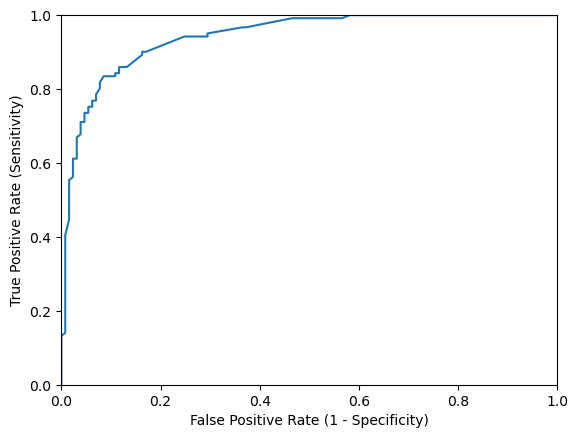

In [60]:
# get values for ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

# plot ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [62]:
# calculate AUC
print(metrics.roc_auc_score(y_test, y_pred))

0.9423409571401115


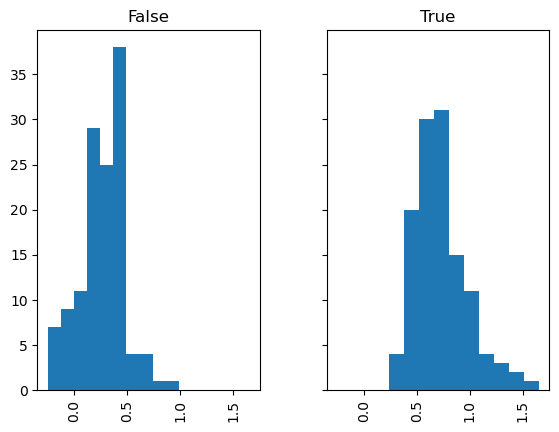

In [63]:
# histogram of predicted probabilities grouped by actual response value
df = pd.DataFrame({'probability':y_pred, 'actual':y_test})
df.hist(column='probability', by='actual', sharex=True, sharey=True)
plt.show()

In [64]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

C:\Users\elror\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\elror\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\elror\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\elror\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 381, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "C:\Users\elror\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py", line 567, in roc_auc_score
    return _average_binary_score(
  File "C:\Users\elror\anaconda3\lib\site-packages\sklearn\metrics\_base.py", line 75, in _average_binary_score
    retur

nan

Random forest feature selection

In [23]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

clf = RandomForestClassifier(n_estimators = 500, n_jobs = -1)
clf.fit(data[train_cols], df_accounts['Pregnant'])

RandomForestClassifier(n_estimators=500, n_jobs=-1)

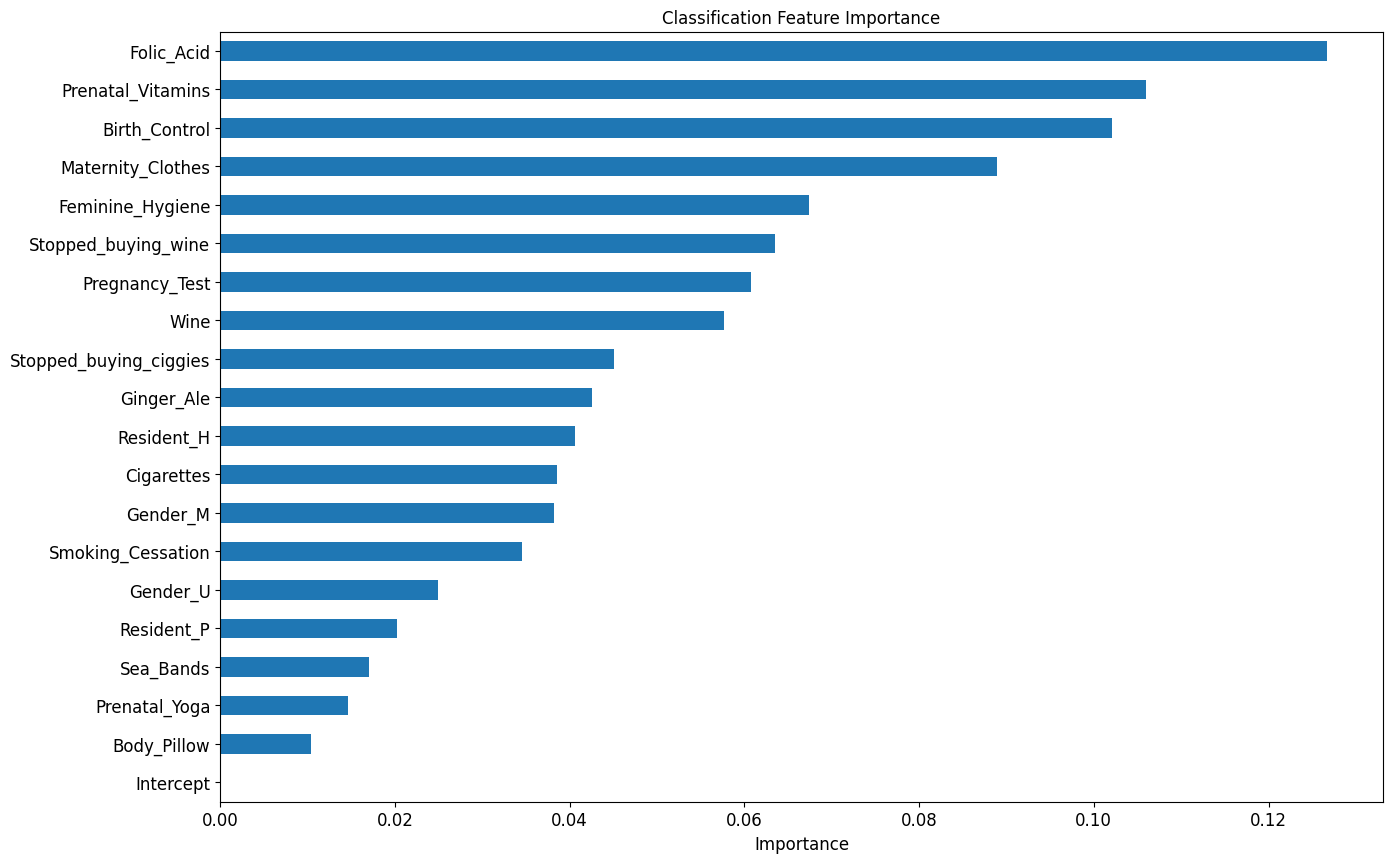

In [24]:
# sort the features by importance
sorted_idx = clf.feature_importances_
df_features = pd.DataFrame({"Feature": train_cols})
df_features['Importance'] = sorted_idx

df_features = df_features.sort_values(by=['Importance'], ascending=[True]) # sort my most important feature
ax = df_features.plot(kind='barh', title ="Classification Feature Importance", figsize=(15, 10), legend=False, fontsize=12)
ax.set_xlabel("Importance", fontsize=12)
ax.set_yticklabels(df_features['Feature'])
plt.show()

We can see that the purchase of Folic Acid is a much better predictor of a customer pregnancy, surprisingly more so than an intrest in Prenatal Yoga (presumably more expectant mother use folic acid than take up yoga)---this information could be used to accurately target the advertisment of baby products